# FOTD Model Fit Example

Fit some high order Model to a FOTD System

In [1]:
# General Pacakages
import sympy as sp
import numpy as np
import control as cn
#Plotting
import bokeh.plotting as bk
import bokeh.io as bi
from bokeh.io import export_svgs
bi.output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

# Algorithms
import Algorithms as alg

# TUBS Rot, Gelb, Orange, Hellgrün, Grün, Dunkelgrün, Hellblau, Blau, Dunkelblau, Violett
TUBScolorscale=[(190,30,60,0.9),
               (255,200,42,0.9),
               (225,109,0,0.9),
               (172,193,58,0.9),
               (109,131,0,0.9),
               (0,83,74,0.9),
               (102,180,211,0.9),
               (0,112,155,0.9),
               (0,63,87,0.9),
               (138,48,127,0.9)]

Loading BokehJS ...

In [2]:
## Generate a High Order System
num = [[[1]]]
den = [[[1,1.8,0.9]]]
G = cn.tf(num,den)
t = np.linspace(0,10,1000)
y, t = cn.step(G,t)
u = np.ones_like(t)
# Identify the parameter
K,T,L = alg.Integral_Identification(y,u,t)
num, den = cn.pade(L,10)
GM = cn.tf([K],[T,1])*cn.tf(num,den)
yM,tM = cn.step(GM,t)

In [3]:
# Define the figure
p1 = bk.figure(x_range=(t[0],t[-1]), y_range = (-0.1,np.ceil(np.max(y))), plot_width = 800, plot_height = 300)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
p1.line(tM,yM, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
#p1.scatter(t,yreal, size=1,fill_color=TUBScolorscale[5],fill_alpha=0.4, legend="Measurement")
p1.line(t,y, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p1.xaxis.axis_label = "Time [min]"
p1.yaxis.axis_label = "Output"
p1.legend.location = "bottom_right"
# Show and Export
p1.output_backend = "svg"
export_svgs(p1, filename="Area_Example.svg")
bk.show(p1)

In [4]:
# Make an area plot
from bokeh.charts import Area

data_area = dict(
    model = yM,
    original=y)

p2 = Area(data_area)
bk.show(p2)

/home/alcapitan/anaconda3/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='317b264f-e649-4ab6-9754-4910526a4eb9', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='85fd263d-7285-4e2a-aa2f-39ba16471b4f', ...)


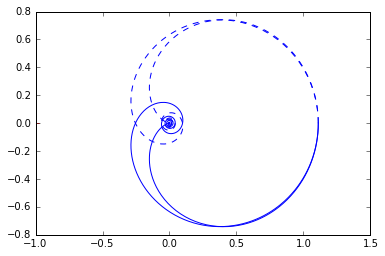

In [5]:
w = np.logspace(-5,5,1000)

real1,imag1,omega1 = cn.nyquist_plot(G,w)
real2,imag2,omega2 = cn.nyquist_plot(GM,w)

# Define the figure
p2 = bk.figure(plot_width = 800, plot_height = 300)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
p2.line(real2,imag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p2.line(real1,imag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p2.xaxis.axis_label = "Re"
p2.yaxis.axis_label = "Im"
p2.legend.location = "top_right"
# Show and Export
p2.output_backend = "svg"
export_svgs(p2, filename="Area_Nyquist.svg")
bk.show(p2)

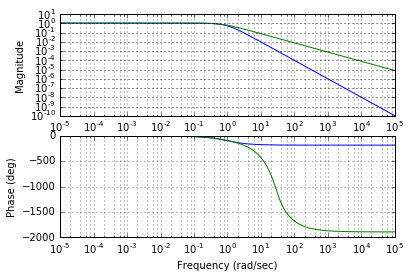

In [6]:
mag1,phase1,omega1 = cn.bode_plot(G,w)
mag2,phase2,omega2 = cn.bode_plot(GM,w)

# Define the figure
p3 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")

# Define the Data
p3.line(omega2,mag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p3.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p3.xaxis.axis_label = "Frequency [rad/s]"
p3.yaxis.axis_label = "Gain [dB]"

# Define the figure
p4 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p4.line(omega2[np.where(phase2>-360)],phase2[np.where(phase2>-360)], line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p4.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p4.xaxis.axis_label = "Frequency [rad/s]"
p4.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p3],[p4]])
# Show and Export
p3.output_backend = "svg"
p4.output_backend = "svg"

export_svgs(p3, filename="Area_Bode_Gain.svg")
export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

In [7]:
# Define the figure
p5 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")
# Define the Data
p5.line(omega2[np.where(mag2>mag1)],mag2[np.where(mag2>mag1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p5.line(omega2[np.where(mag2<mag1)],mag2[np.where(mag2<mag1)], line_color=TUBScolorscale[0], line_width = 2, legend="Robust")
p5.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p5.xaxis.axis_label = "Frequency [rad/s]"
p5.yaxis.axis_label = "Gain [dB]"


# Define the figure
p6 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p6.line(omega2[np.where(phase2<phase1)],phase2[np.where(phase2<phase1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p6.line(omega2[np.where(phase2>phase1)],phase2[np.where(phase2> phase1)], line_color=TUBScolorscale[0], line_width = 2, legend="Not Robust")
p6.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p6.xaxis.axis_label = "Frequency [rad/s]"
p6.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p5],[p6]])
# Show and Export
p5.output_backend = "svg"
p6.output_backend = "svg"

#export_svgs(p3, filename="Area_Bode_Gain.svg")
#export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

0.783029912481


['Maximum_Sensitivity.svg']

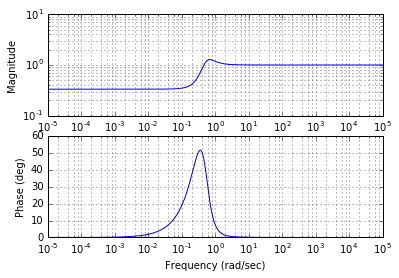

In [2]:
from bokeh.models.glyphs import Ellipse
from bokeh.models import LabelSet, Label

w = np.logspace(-5,5,1000)

# Compute the open loop
G = cn.tf([.1,1],[10,5,1])*(cn.tf([2],[1]))
real1,imag1,omega1 = cn.nyquist_plot(G,w)

# Compute the Sensitivity
S = 1/(1+G)
mag,phase,omega = cn.bode(S,w)

# Get the maximum of sensitivity
max_w = np.argmax(mag)

# Get the value of SM
sm = 1/mag[max_w]
print(sm)


# Define the figure
p2 = bk.figure(x_range = [-2.5,4], y_range=[-1.5,1.5], width = 800, height = 400, match_aspect = True,aspect_scale = 1)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
#p2.line(real2,imag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p2.ellipse(x = -1,y = 0, width = 2,height =  2, angle = 0, fill_color = TUBScolorscale[0], fill_alpha = 0.5, line_color = None, legend="Nyquist Circle")
p2.ellipse(x = -1,y = 0, width = 2*sm,height =  2*sm, angle = 0, fill_color = 'white', line_color = None)
p2.ellipse(x = -1,y = 0, width = 2*sm,height =2*sm, angle = 0, fill_color = TUBScolorscale[2],fill_alpha = 0.35, line_color = None, legend="sM")
p2.line((-1,real1[max_w]),(0,imag1[max_w]), line_dash = "dashed")
p2.line(real1,imag1, line_color=TUBScolorscale[6], line_width = 2, legend = "Open Loop")
p2.circle(real1[max_w],imag1[max_w], radius = .02, fill_color = "white")
p2.cross(-1,0, color = "black")



# Add the sensitivity
# Define the axis label
p2.xaxis.axis_label = "Re"
p2.yaxis.axis_label = "Im"
p2.legend.location = "top_right"
# Add Label
mytext = Label(x=-1, y=0.1, text='(-1,0)', text_font_size = '10pt')
p2.add_layout(mytext)
# Remove 
p2.toolbar.logo = None
p2.toolbar_location = None
p2.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p2.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels

#bk.show(p2)

# Show and Export
p2.output_backend = "svg"
export_svgs(p2, filename="Maximum_Sensitivity.svg")

In [339]:
# Make the Singular Value Decomposition graphics

# Make the Points
x = np.ones(2)
# Make a Matrix
G = lambda w:np.abs(np.array([[(1+0.5j*w)/(10j*w+1),(4+0.01*w**2)/(12j*w+1-0.1*w**2)],[2/(0.1j*w+1-0.1*w**2),3/(7j*w+1)]]))
# Make the Bode Plot
omega = np.logspace(-3,1,1e4)
gain = []
sv = []
for w in omega:
    gain.append(np.dot(G(w),x))
    
    #max_sv = np.max(v)
    #min_sv = np.min(v)
    sv.append(np.linalg.svd(G(w), compute_uv=False))
# Rearrange
gain = np.vstack(gain)
sv = np.vstack(sv)
# Get the maximum singular value
sv_max = np.max(sv[:,0])
# Make an array for plotting
sv_max = sv_max*np.ones_like(omega)

# Make a plot
p = bk.figure(x_axis_type = "log", y_axis_type="log", y_range = [0.1,10], width = 500, height = 300)
p.line(omega,gain[:,0], line_color = TUBScolorscale[6], line_width = 2, legend = "Output 1")
p.line(omega,gain[:,1], line_color = TUBScolorscale[2], line_width = 2, legend = "Output 2")
p.line(omega,sv[:,0], line_dash = "dashed", line_color = "black", line_width = 2, legend = "Singular Values")
p.line(omega,sv[:,1], line_dash = "dashed", line_color = "black", line_width = 2)
p.line(omega,sv_max, line_color = TUBScolorscale[0], line_width = 2, legend = "Maximum Singular Value")
p.legend.location = "bottom_left"
# Remove 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels
#bk.show(p)

# Show and Export
p.output_backend = "svg"
export_svgs(p, filename="Bode_Singular_Value.svg")

['Bode_Singular_Value.svg']

In [6]:
# Make an example plot for the ellipsis
from bokeh.models import Arrow, NormalHead
# Rotation Matrix
R = lambda phi: np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi),np.cos(phi)]])
S = np.diag([.2,0.8])
# Angles
phi1 = np.radians(-30.)
phi2 = np.radians(-50.)
# Create U,V
U = R(phi1)
V = R(phi2)
# Since the matrix is a rep for the axis, use matrix columns
US = np.dot(S,U)
USV = np.dot(V,US)

p = bk.figure(x_range = [-1.1,1.1], y_range=[-1.1,1.1], match_aspect = True, width = 300, height = 300)

p.ellipse(x=0,y=0, width = 0.4, height= 1.6, angle = -phi1, fill_color = TUBScolorscale[0], fill_alpha = 0.3, line_color = None)
p.ellipse(x=0,y=0, width = 0.4, height= 1.6, angle = -phi1, fill_color = None, line_color = TUBScolorscale[0], legend = "Maximum Singular Value", line_dash = "dashed")
# Original axis / Input
p.add_layout(Arrow(end=NormalHead(fill_color="black", size = 10, line_color = "black"),
                   line_color = "black",
                   x_start=0, y_start=0, x_end=1, y_end=0))
p.add_layout(Arrow(end=NormalHead(fill_color="black", size = 10, line_color = "black"),
                   line_color = "black",
                   x_start=0, y_start=0, x_end=0, y_end=1))
# Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[7], size = 10, line_color = TUBScolorscale[7]),
                   line_color = TUBScolorscale[7],
                   x_start=0, y_start=0, x_end=U[0,0], y_end=U[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[7], size = 10, line_color = TUBScolorscale[7]),
                   line_color = TUBScolorscale[7],
                   x_start=0, y_start=0, x_end=U[1,0], y_end=U[1,1]))
# Scaled, Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[0], size = 10, line_color = TUBScolorscale[0]),
                   line_color = TUBScolorscale[0],
                   x_start=0, y_start=0, x_end=US[0,0], y_end=US[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[0], size = 10, line_color = TUBScolorscale[0]),
                   line_color = TUBScolorscale[0],
                   x_start=0, y_start=0, x_end=US[1,0], y_end=US[1,1]))
# Scaled, Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[2], size = 10, line_color = TUBScolorscale[2]),
                   line_color = TUBScolorscale[2],
                   x_start=0, y_start=0, x_end=USV[0,0], y_end=USV[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[2], size = 10, line_color = TUBScolorscale[2]),
                   line_color = TUBScolorscale[2],
                   x_start=0, y_start=0, x_end=USV[1,0], y_end=USV[1,1]))
# Annotation
text1 = (Label(x=0.3, y=-0.15, text='Original Input', text_color = "black"))
text2 = (Label(x=0.3, y=0.55, text='Rotated Input', text_color = TUBScolorscale[7]))
text3 = (Label(x=-0.8, y=0.3, text='Output', text_color = TUBScolorscale[2]))
p.add_layout(text1)
p.add_layout(text2)
p.add_layout(text3)
# Remove 
p.toolbar.logo = None
p.toolbar_location = None
p.axis.visible = False
p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels
p.grid.visible = False
p.legend.location = "bottom_left"
#bk.show(p)

# Show and Export
p.output_backend = "svg"
export_svgs(p, filename="Singular_Value_Transform.svg")

['Singular_Value_Transform.svg']